# Sales Forecasting

In most, not to say all, kinds of business, sales forecasting is an essential operation, since it gives a reliable estimative of the future performance of the company, allowing a better decision making process. In this project, we are going to use a [kaggle dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) with information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. We are going through the main steps in the sales forecasting process. This report  divided in 4 steps: 

* Setting up the data
* Exploratory data analysis
* Creating a baseline model
* Building the final model

## Setting up the data

Let us start by importing the main packages to be used and by loading the dataset with the orders.

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'data/'

df_orders = pd.read_csv(path+'olist_orders_dataset.csv')
df_orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


We have 99440 observations. Now we are going to load the dataset with the orders itens information.

In [14]:
df_itens = pd.read_csv(path+'olist_order_items_dataset.csv')
df_itens.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


We have 112650 observations. This difference in quantity happens due to the fact that a single order can have multiple itens. Now we are going to load the dataset products information. Although it is not relevant in the forecasting per say, it is useful to report the results.

In [15]:
df_products = pd.read_csv(path+'olist_products_dataset.csv')
df_products.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


We have 32951 observations. Now let us merge the three dataframes. Then, we will be getting only the necessary columns from each dataframe. The following columns will be chosen:

* order_id
* order_purchase_timestamp
* price
* freight_value
* product_category_name
* order_item_id

In [59]:
df = df_orders.merge(df_itens, on=['order_id'])
df = df.merge(df_products, on=['product_id'])
df = df[['order_id', 'product_id', 'order_purchase_timestamp', 'price', 'freight_value', 'product_category_name', 'order_item_id']]
df.tail()

,order_id,product_id,order_purchase_timestamp,price,freight_value,product_category_name,order_item_id
112645,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,2017-08-10 21:21:07,356.0,18.12,esporte_lazer,1
112646,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,2017-08-10 21:21:07,356.0,18.12,esporte_lazer,2
112647,cfa78b997e329a5295b4ee6972c02979,3d2c44374ee42b3003a470f3e937a2ea,2017-12-20 09:52:41,55.9,15.14,instrumentos_musicais,1
112648,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,2017-03-09 09:54:05,72.0,13.08,beleza_saude,1
112649,66dea50a8b16d9b4dee7af250b4be1a5,006619bbed68b000c8ba3f8725d5409e,2018-03-08 20:57:30,68.5,18.36,beleza_saude,1


As expected, we ended up with 5 columns and 112650 rows. Now let us check the data types.

In [60]:
df.dtypes

order_id                     object
product_id                   object
order_purchase_timestamp     object
price                       float64
freight_value               float64
product_category_name        object
order_item_id                 int64
dtype: object

Let us create a date column using the order_purchase_timestamp column, since most of forecasting algorithms work with this data format. In this project we will not need the time of the purchase, so we are only getting the date. 

In [61]:
df['date'] = pd.to_datetime(df['order_purchase_timestamp']).dt.normalize()
df.tail()

,order_id,product_id,order_purchase_timestamp,price,freight_value,product_category_name,order_item_id,date
112645,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,2017-08-10 21:21:07,356.0,18.12,esporte_lazer,1,2017-08-10
112646,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,2017-08-10 21:21:07,356.0,18.12,esporte_lazer,2,2017-08-10
112647,cfa78b997e329a5295b4ee6972c02979,3d2c44374ee42b3003a470f3e937a2ea,2017-12-20 09:52:41,55.9,15.14,instrumentos_musicais,1,2017-12-20
112648,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,2017-03-09 09:54:05,72.0,13.08,beleza_saude,1,2017-03-09
112649,66dea50a8b16d9b4dee7af250b4be1a5,006619bbed68b000c8ba3f8725d5409e,2018-03-08 20:57:30,68.5,18.36,beleza_saude,1,2018-03-08


There are a few more steps in order to get our dataframe ready to the forecasting models required format, but let us pause here and take a deeper look into the data.

## Exploratory Data Analysis

In this part of the report, we are going to answer the following questions:

* Is there a specific period where purchases are more likely?
* Which category sells the most?
* How many itens are bought per order?

Let us start by comparing the volume of sales per month. This comparison can be done in a very straightforward way, since the dataset period ranges from 09/04/2016 to 09/03/2018. 

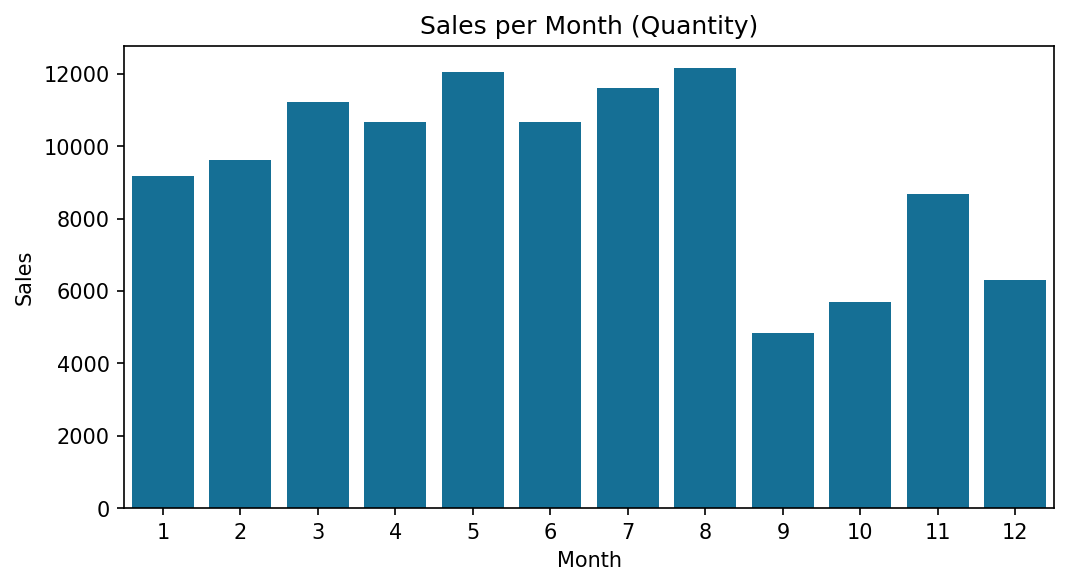

In [62]:
df_grouped_month = df[['date', 'price']].copy()
df_grouped_month['month'] = df_grouped_month['date'].dt.month
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
sns.barplot(data=df_grouped_month.groupby('month').count().reset_index(), x='month', y='date', ax=ax, color='#0077AA')
ax.set_title("Sales per Month (Quantity)")
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
plt.show()

The top selling months in quantity were May and August, with a number around 12000 units. September was the worst selling month, with a number close to 5000 units. Now let us see the months performance in revenue.

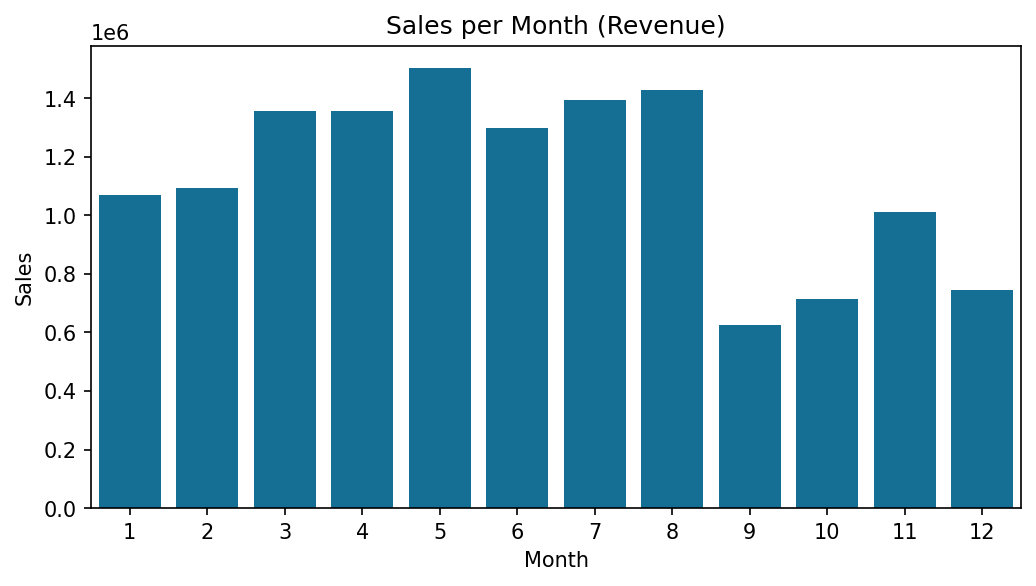

In [63]:
df_grouped_month = df[['date', 'price']].copy()
df_grouped_month['month'] = df_grouped_month['date'].dt.month
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
sns.barplot(data=df_grouped_month.groupby('month')['price'].sum().reset_index(), x='month', y='price', ax=ax, color='#0077AA')
ax.set_title("Sales per Month (Revenue)")
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
plt.show()

The behavior is very similar, with the top selling month being May (revenue above 1.4 million) and the bottom selling month being September (revenue around 0.6 million). Now let us check the sales by category. First, we are going to see the total number of categories.

In [64]:
print("Number of categories: ", df['product_category_name'].nunique())

Number of categories:  73


Since the number of categories is too high, it is not possible to use it in a more graphical way. Let us just check the category with most a least sales by quantity and revenue.

In [65]:
df_grouped_category = df[['product_category_name', 'price']].copy()
category_quantity_max = df_grouped_category.groupby('product_category_name').count().idxmax().values[0]
quantity_max = df_grouped_category.groupby('product_category_name').count().max().values[0]
category_quantity_min = df_grouped_category.groupby('product_category_name').count().idxmin().values[0]
quantity_min = df_grouped_category.groupby('product_category_name').count().min().values[0]
print("Top selling category by quantity was {} with {} units".format(category_quantity_max, quantity_max))
print("Bottom selling category by quantity was {} with {} units".format(category_quantity_min, quantity_min))

Top selling category by quantity was cama_mesa_banho with 11115 units
Bottom selling category by quantity was seguros_e_servicos with 2 units


In [66]:
category_revenue_max = df_grouped_category.groupby('product_category_name').sum().idxmax().values[0]
revenue_max = df_grouped_category.groupby('product_category_name').sum().max().values[0]
category_revenue_min = df_grouped_category.groupby('product_category_name').sum().idxmin().values[0]
revenue_min = df_grouped_category.groupby('product_category_name').sum().min().values[0]
print("Top selling category by revenue was {} with {} units".format(category_revenue_max, revenue_max))
print("Bottom selling category by revenue was {} with {} units".format(category_revenue_min, revenue_min))

Top selling category by revenue was beleza_saude with 1258681.34 units
Bottom selling category by revenue was seguros_e_servicos with 283.28999999999996 units


Even though the category cama_mesa_banho sold the most units, those itens are not as expensive as the beleza_saude ones. The category seguros_e_servicos performed the worst in both scenarios. Now let us get some general information about the amount of itens per order and that will conclude our exploratory data analysis.

In [71]:
df_grouped_order = df[['order_id', 'order_item_id']].copy()
max_quantity_order = df_grouped_order['order_item_id'].max()
avg_quantity_order = df_grouped_order.groupby('order_id').count().mean().values[0]
print("Maximum number of itens in a single order: ", max_quantity_order)
print("Average number of itens per order: ", round(avg_quantity_order, 2))

Maximum number of itens in a single order:  21
Average number of itens per order:  1.14


## Baseline Model